In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt



In [ ]:

import pandas as pd
# Mount the drive to access data
#from google.colab import drive
#drive.mount('/content/drive')
# Load the patient details
df = pd.read_csv('covid inflammatory markers.csv')
df

Mounted at /content/drive


,no,age,sex,severe,outcome,IL6,LDH,Ferritin,CRP,Hemoglobin,TLC,Neutrophil %,Lymphocyte %,Monocyte %,Platelet Count,ANC,ALC,NLR,PLR,LCR
0,1,26,M,0,survived,290.37,501,2000.0,14.6,5.6,5.61,59.7,24.1,8.2,325,3.35,1.35,2.48,240.38,1.65
1,2,47,F,0,survived,21.31,645,169.0,10.6,13.8,21.20,90.0,5.0,3.0,411,19.08,1.06,18.00,387.74,0.47
2,3,74,F,0,survived,4.67,1477,431.0,4.5,10.1,17.80,90.0,5.0,5.0,870,16.02,0.89,18.00,977.53,1.11
3,4,70,M,0,survived,49.20,1385,40.0,1.0,9.7,12.16,74.1,14.3,11.2,271,9.01,1.74,5.18,155.85,14.30
4,5,58,M,0,survived,185.36,653,2000.0,28.2,6.7,20.90,95.0,3.0,2.0,288,19.86,0.63,31.67,459.33,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,758,35,M,0,death,200.21,722,760.0,37.4,13.1,9.76,88.9,7.1,3.7,15,8.68,0.69,12.52,21.65,0.19
397,760,43,M,0,survived,259.97,418,285.0,20.0,10.0,10.39,53.7,35.0,8.6,250,5.58,3.64,1.53,68.75,1.75
398,762,39,M,0,survived,23.78,513,471.0,5.0,16.7,4.18,74.4,12.7,12.7,265,3.11,0.53,5.86,499.19,2.54
399,763,70,M,0,survived,60.79,6705,1630.0,18.0,14.4,9.13,87.0,6.5,6.4,132,7.94,0.59,13.38,222.43,0.36


In [ ]:
# write code to check the data types of the columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no              401 non-null    int64  
 1   age             401 non-null    int64  
 2   sex             401 non-null    object 
 3   severe          401 non-null    int64  
 4   outcome         401 non-null    object 
 5   IL6             401 non-null    float64
 6   LDH             401 non-null    int64  
 7   Ferritin        401 non-null    float64
 8   CRP             401 non-null    float64
 9   Hemoglobin      401 non-null    float64
 10  TLC             401 non-null    float64
 11  Neutrophil %    401 non-null    float64
 12  Lymphocyte %    401 non-null    float64
 13  Monocyte %      401 non-null    float64
 14  Platelet Count  401 non-null    int64  
 15  ANC             401 non-null    float64
 16  ALC             401 non-null    float64
 17  NLR             401 non-null    flo

In [ ]:

# check the number of missing values in each column
df.isnull().sum()

no                0
age               0
sex               0
severe            0
outcome           0
IL6               0
LDH               0
Ferritin          0
CRP               0
Hemoglobin        0
TLC               0
Neutrophil %      0
Lymphocyte %      0
Monocyte %        0
Platelet Count    0
ANC               0
ALC               0
NLR               0
PLR               0
LCR               0
dtype: int64

### Let's Preprocess the data

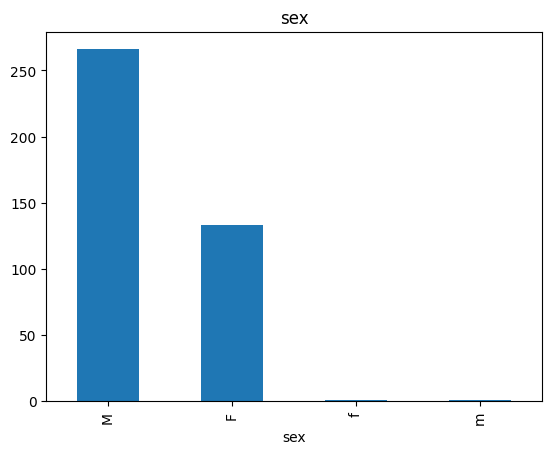

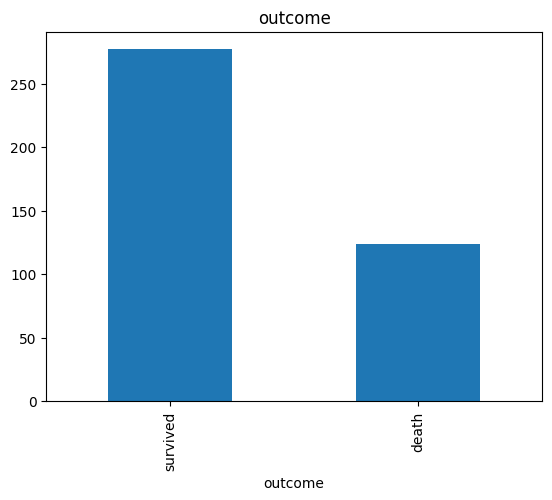

In [ ]:
#select categorical columns and make bar chart
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].value_counts().plot(kind="bar", title=column)
    plt.show()


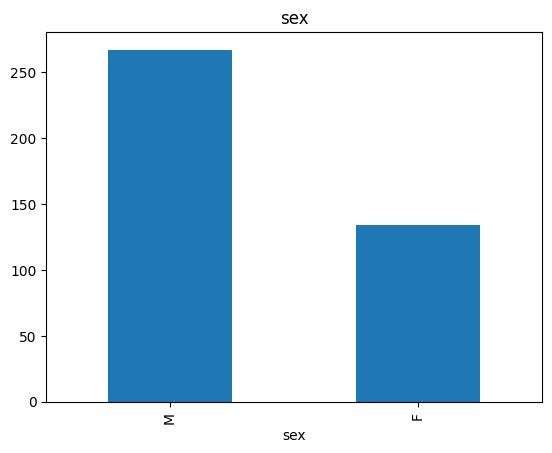

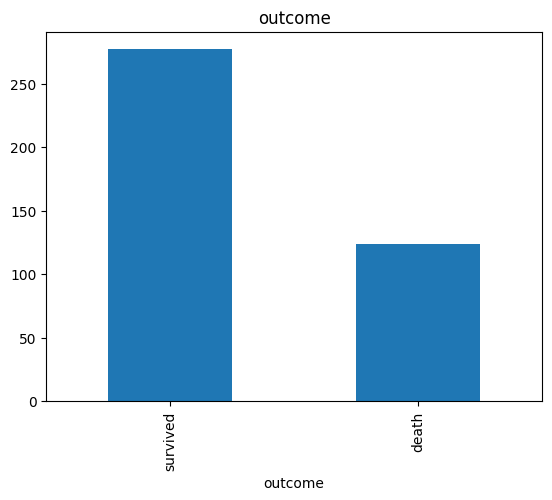

In [ ]:
df['sex'] = df['sex'].replace({'m': 'M', 'f': 'F'})
for column in categorical_columns:
    df[column].value_counts().plot(kind="bar", title=column)
    plt.show()

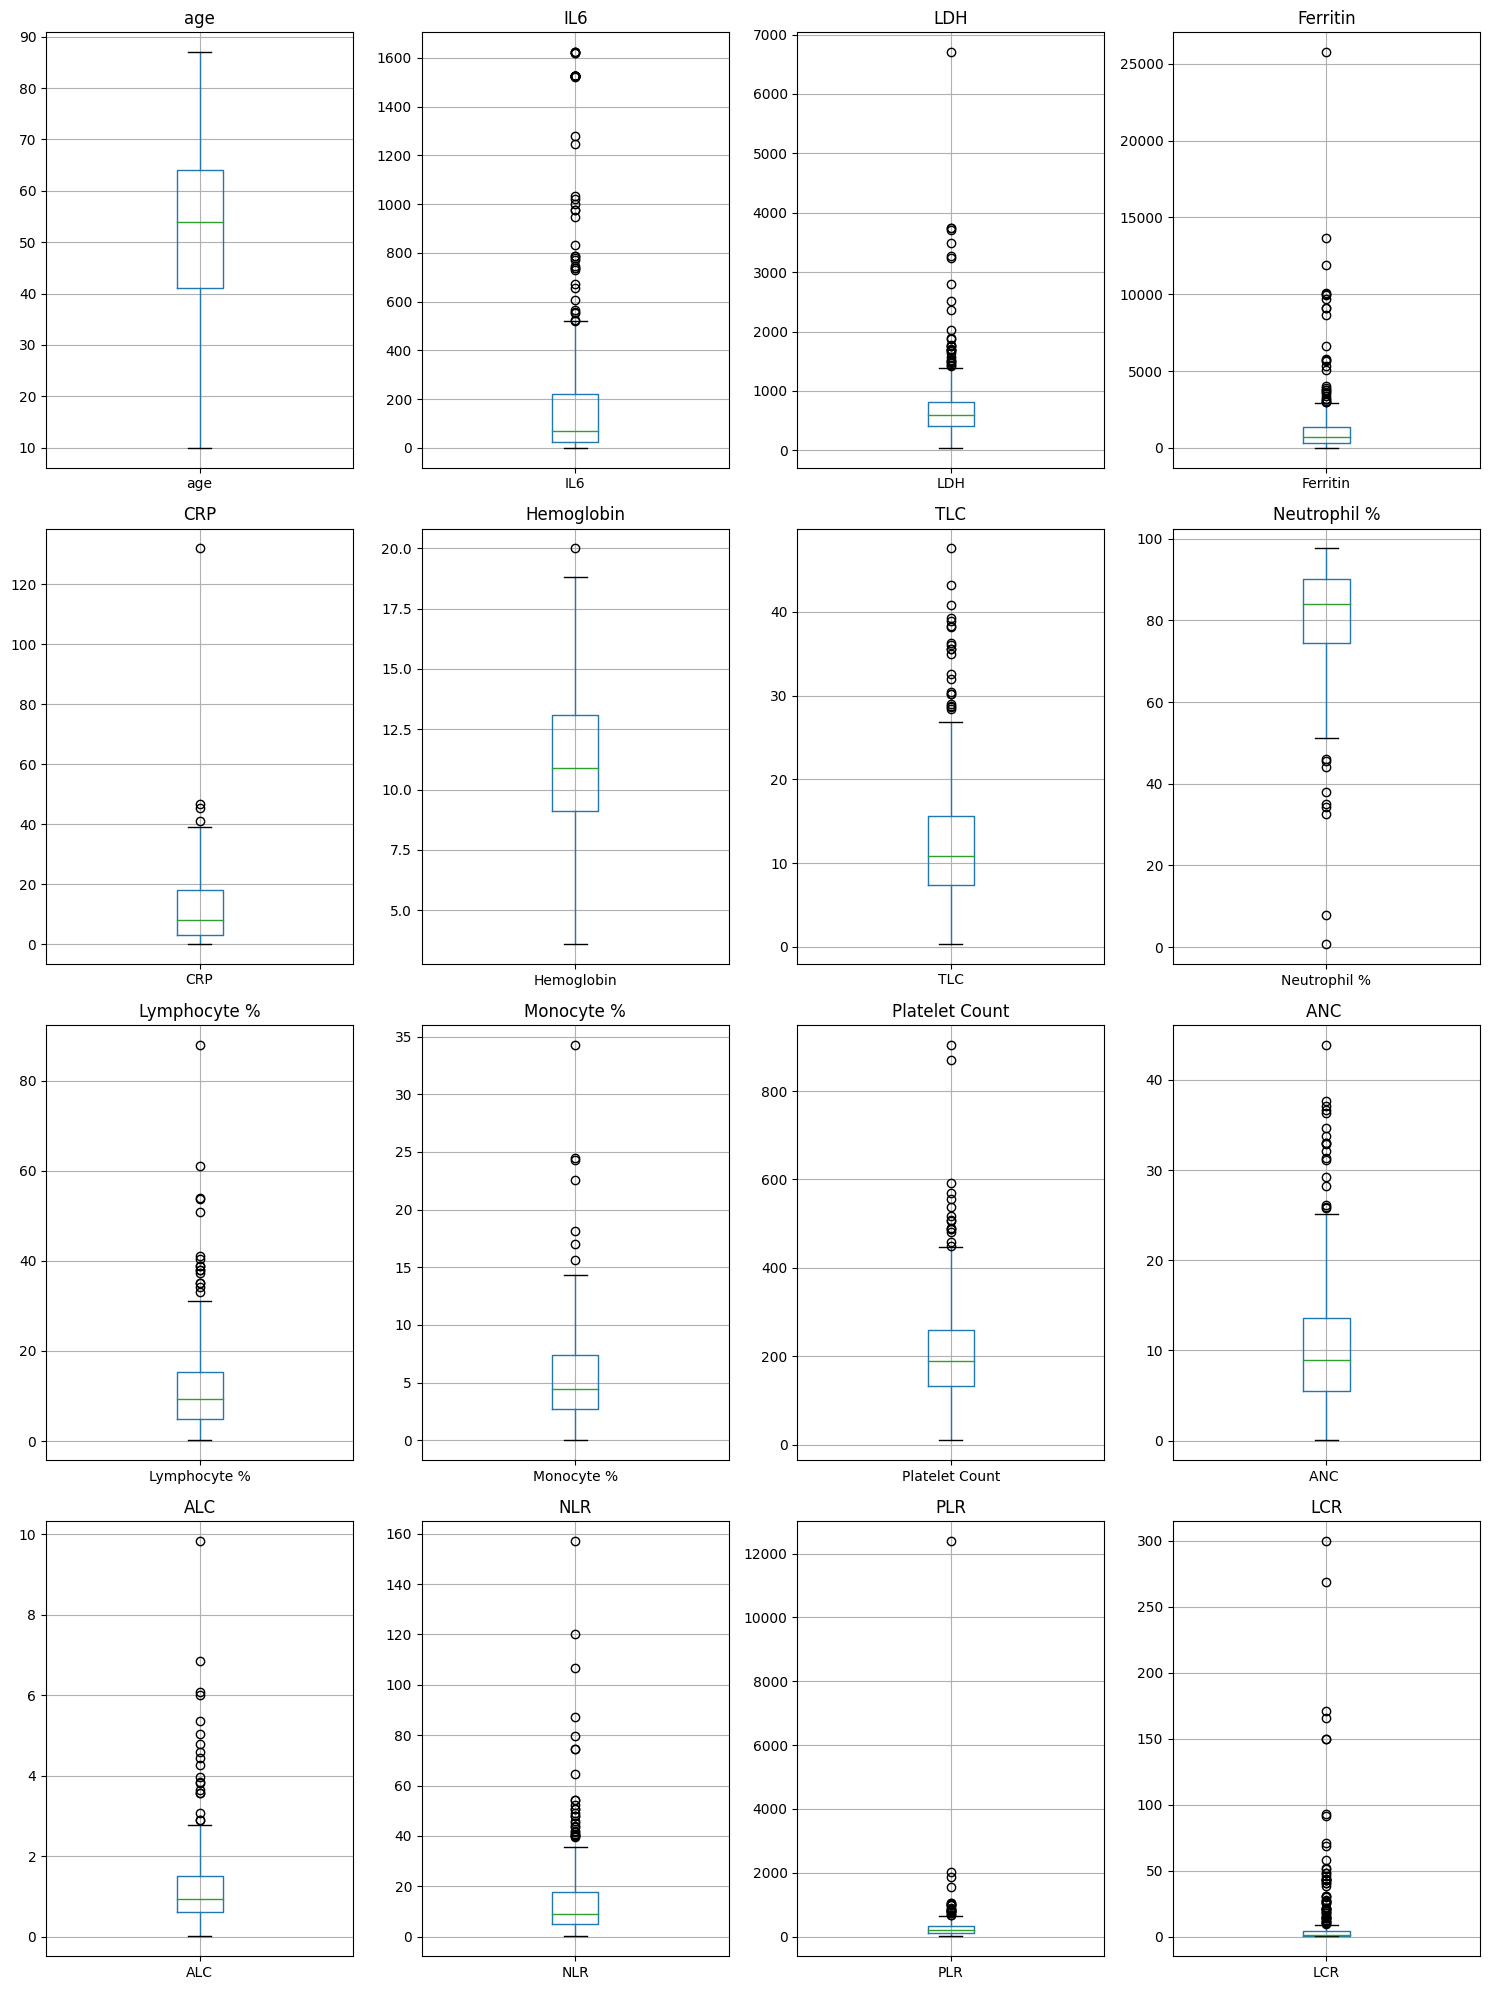

In [ ]:

# 'sex' and severe as categorical variables

categorical_cols = ['sex', 'severe']
numerical_cols = [col for col in df.columns if col not in categorical_cols + ['outcome'] + ['no']]

# Calculate the number of rows needed for subplots
num_rows = (len(numerical_cols) + 3) // 4

# Create subplots with 4 columns and the calculated number of rows
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Hide empty subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()
# make boxplot for numerical columns and show the same in plots of 4 rows




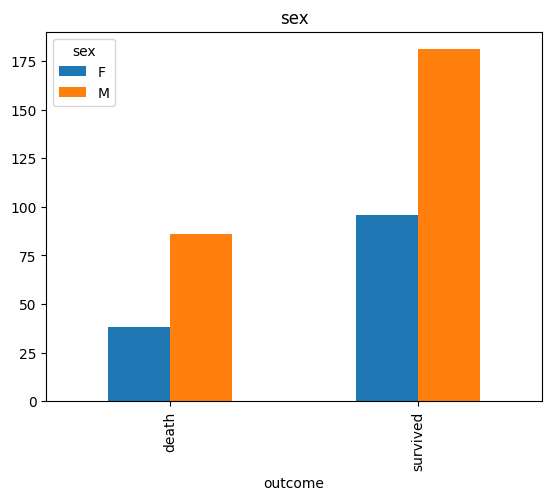

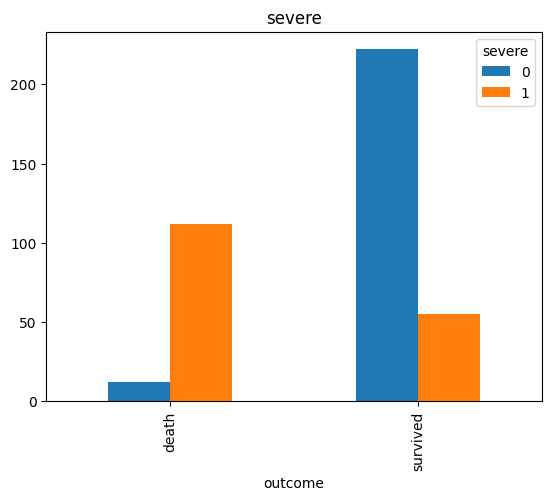

In [ ]:
# for each outcome type as colour  , show barplot of each categorical column
for column in categorical_cols:
    df.groupby('outcome')[column].value_counts().unstack().plot(kind="bar", title=column)
    plt.show()

## Split the dataset

In [ ]:



# Splitting dataset into training and testing sets with stratification to maintain 'outcome' ratio
train_df, test_df = train_test_split(df, test_size=0.25, stratify=df['outcome'], random_state=142)

# Reset indices of train_df and test_df to align with y_train and y_test
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Separate features and target variable for training and testing data
X_train = train_df.drop(['no', 'outcome'], axis=1)
y_train = np.where(train_df['outcome'] == 'survived', 0, 1)
X_test = test_df.drop(['no', 'outcome'], axis=1)
y_test = np.where(test_df['outcome'] == 'survived', 0, 1)


In [ ]:
X_train.head()

,age,sex,severe,IL6,LDH,Ferritin,CRP,Hemoglobin,TLC,Neutrophil %,Lymphocyte %,Monocyte %,Platelet Count,ANC,ALC,NLR,PLR,LCR
0,58,M,0,53.94,381,539.0,13.6,14.2,7.79,76.2,12.1,10.1,116,5.94,0.94,6.30,123.07,0.89
1,18,F,0,2.10,536,307.0,1.7,13.2,9.49,86.9,9.0,3.9,227,8.25,0.85,9.66,265.78,5.29
2,63,M,1,1528.00,1176,955.0,13.5,16.7,6.40,90.7,6.4,2.0,197,5.80,0.41,14.17,480.96,0.47
3,55,M,0,5.53,390,1009.0,0.2,8.8,23.70,90.5,5.1,3.9,323,21.45,1.21,17.75,267.23,25.50
4,48,F,1,180.74,406,236.0,11.4,12.2,23.57,64.3,29.0,3.0,210,15.16,6.84,2.22,30.72,2.54


In [ ]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(300, 18) (300,)
(101, 18) (101,)


In [ ]:

# Standardizing numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
# One-hot encoding categorical columns
encoder = OneHotEncoder( drop='first')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]).toarray(),
                               columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]).toarray(),
                              columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded ones
X_train = X_train.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test.drop(categorical_cols, axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)



In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(300, 18) (300,)
(101, 18) (101,)


In [ ]:
X_train.head()

,age,IL6,LDH,Ferritin,CRP,Hemoglobin,TLC,Neutrophil %,Lymphocyte %,Monocyte %,Platelet Count,ANC,ALC,NLR,PLR,LCR,sex_M,severe_1
0,0.334763,-0.481833,-0.610671,-0.394990,0.294963,1.138377,-0.619062,-0.395985,0.026975,1.083286,-0.818592,-0.643732,-0.243065,-0.472469,-0.600159,-0.282028,1.0,0.0
1,-2.238687,-0.596662,-0.296703,-0.571366,-0.926267,0.786200,-0.409756,0.484530,-0.288980,-0.411678,0.138204,-0.339085,-0.337779,-0.282226,-0.038892,-0.111382,0.0,0.0
2,0.656444,2.783295,0.999681,-0.078728,0.284700,2.018820,-0.790200,0.797237,-0.553975,-0.869812,-0.120390,-0.662195,-0.800826,-0.026870,0.807394,-0.298317,1.0,1.0
3,0.141754,-0.589064,-0.592441,-0.037675,-1.080203,-0.763379,1.339797,0.780779,-0.686473,-0.411678,0.965702,1.401753,0.041078,0.175830,-0.033189,0.672428,1.0,0.0
4,-0.308600,-0.200964,-0.560031,-0.625344,0.069189,0.434023,1.323791,-1.375250,1.749442,-0.628689,-0.008332,0.572217,5.965973,-0.703479,-0.963365,-0.218036,0.0,1.0


#### Now Train and Test dataset is ready for building Models

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Base Logistic Regression model with 10-fold cross-validation
logreg = LogisticRegression()
kf = StratifiedKFold(n_splits=10)

# Hyperparameter tuning setup
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(logreg, param_grid, cv=kf, scoring='roc_auc')

# Fitting the model
grid_search.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [ ]:

# Metrics calculation function
def calculate_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred) # Recall is same as sensitivity
    specificity = recall_score(y_true, y_pred, pos_label=0)
    ppv = precision_score(y_true, y_pred) # Positive Predictive Value
    npv = precision_score(y_true, y_pred, pos_label=0) # Negative Predictive Value
    auc_score = roc_auc_score(y_true, y_pred_proba)
    return accuracy, sensitivity, specificity, ppv, npv, auc_score

# Evaluating model on training data
train_pred = grid_search.predict(X_train)
train_pred_proba = grid_search.predict_proba(X_train)[:, 1]
train_metrics = calculate_metrics(y_train, train_pred, train_pred_proba)

# Evaluating model on test data
test_pred = grid_search.predict(X_test)
test_pred_proba = grid_search.predict_proba(X_test)[:, 1]
test_metrics = calculate_metrics(y_test, test_pred, test_pred_proba)

In [ ]:



# Preparing the metrics table
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'AUC'],
    'Train Data': train_metrics,
    'Test Data': test_metrics
})
metrics_table.set_index('Metric', inplace=True)

# Confusion Matrix for Test Data
confusion_matrix_test = confusion_matrix(y_test, test_pred)


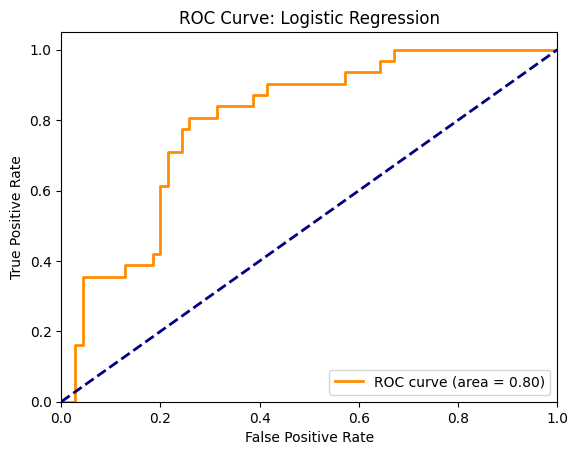

[[53 17]
 [ 8 23]]


,Train_Logistic,Test_Logistic
Metric,,
Accuracy,0.880000,0.752475
Sensitivity,0.817204,0.741935
Specificity,0.908213,0.757143
PPV,0.800000,0.575000
NPV,0.917073,0.868852
AUC,0.943120,0.796774


In [ ]:

# ROC Curve for Test Data
fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")
plt.show()

print(confusion_matrix_test)




metrics_table.columns = ['Train_Logistic', 'Test_Logistic']
metrics_logistic = pd.DataFrame(metrics_table)
metrics_logistic


In [ ]:
# Assuming confusion_matrix_test is already computed as per previous steps
confusion_matrix_df = pd.DataFrame(confusion_matrix_test,
                                   index=['True Survived', 'True Death'],
                                   columns=['Predicted Survived', 'Predicted Death'])



confusion_matrix_df

,Predicted Survived,Predicted Death
True Survived,53,17
True Death,8,23


## Model comparisons

In [ ]:
!pip install catboost
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

def calculate_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)  # Recall is same as sensitivity
    specificity = recall_score(y_true, y_pred, pos_label=0)
    ppv = precision_score(y_true, y_pred)  # Positive Predictive Value
    npv = precision_score(y_true, y_pred, pos_label=0)  # Negative Predictive Value
    auc_score = roc_auc_score(y_true, y_pred_proba)
    return accuracy, sensitivity, specificity, ppv, npv, auc_score

models = {
    'catboost': (CatBoostClassifier(random_state=42), {'iterations': [100, 200, 500], 'depth': [3, 5, 7]}),
    'lr': (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}),
    'lda': (LinearDiscriminantAnalysis(), {}),
    'et': (ExtraTreesClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None]}),
    'gbc': (GradientBoostingClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.5]}),
 #   'lightgbm': (LGBMClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}),
    'rf': (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, None]}),
    'svm': (SVC(kernel='linear', probability=True), {'C': [0.1, 1, 10]}),
    'xgboost': (XGBClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}),
    'knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'qda': (QuadraticDiscriminantAnalysis(), {}),
    'ada': (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}),
    'nb': (GaussianNB(), {}),
    'dt': (DecisionTreeClassifier(random_state=42), {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}),
    'dummy': (DummyClassifier(), {})
}

results = []
for name, (model, param_grid) in models.items():
    kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=['accuracy', 'recall', 'roc_auc_ovr'], refit='recall') # change refit as required
    grid_search.fit(X_train, y_train)

    model = grid_search.best_estimator_
    model.fit(X_train, y_train)

    # Evaluating model on training data
    train_pred = model.predict(X_train)
    train_pred_proba = model.predict_proba(X_train)[:, 1]
    train_metrics = calculate_metrics(y_train, train_pred, train_pred_proba)

    # Evaluating model on test data
    test_pred = model.predict(X_test)
    test_pred_proba = model.predict_proba(X_test)[:, 1]
    test_metrics = calculate_metrics(y_test, test_pred, test_pred_proba)

    results.append([name] + list(train_metrics) + list(test_metrics))

columns = ['Model', 'Train Accuracy', 'Train Sensitivity', 'Train Specificity', 'Train PPV', 'Train NPV', 'Train AUC',
           'Test Accuracy', 'Test Sensitivity', 'Test Specificity', 'Test PPV', 'Test NPV', 'Test AUC']
model_comparison = pd.DataFrame(results, columns=columns)

# Sort the DataFrame based on descending order of "Test Accuracy"
model_comparison = model_comparison.sort_values(by='Test Accuracy', ascending=False)

print(model_comparison)

Streaming output truncated to the last 5000 lines.
258:	learn: 0.1186765	total: 1.7s	remaining: 1.58s
259:	learn: 0.1181044	total: 1.7s	remaining: 1.57s
260:	learn: 0.1173964	total: 1.71s	remaining: 1.56s
261:	learn: 0.1168961	total: 1.72s	remaining: 1.56s
262:	learn: 0.1165208	total: 1.72s	remaining: 1.55s
263:	learn: 0.1160198	total: 1.73s	remaining: 1.54s
264:	learn: 0.1155818	total: 1.73s	remaining: 1.54s
265:	learn: 0.1151204	total: 1.74s	remaining: 1.53s
266:	learn: 0.1144639	total: 1.74s	remaining: 1.52s
267:	learn: 0.1140597	total: 1.75s	remaining: 1.51s
268:	learn: 0.1136259	total: 1.75s	remaining: 1.51s
269:	learn: 0.1132508	total: 1.76s	remaining: 1.5s
270:	learn: 0.1127361	total: 1.76s	remaining: 1.49s
271:	learn: 0.1125460	total: 1.77s	remaining: 1.48s
272:	learn: 0.1121437	total: 1.77s	remaining: 1.48s
273:	learn: 0.1117018	total: 1.78s	remaining: 1.47s
274:	learn: 0.1112991	total: 1.79s	remaining: 1.46s
275:	learn: 0.1108990	total: 1.79s	remaining: 1.46s
276:	learn: 0.11

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_comparison

,Model,Train Accuracy,Train Sensitivity,Train Specificity,Train PPV,Train NPV,Train AUC,Test Accuracy,Test Sensitivity,Test Specificity,Test PPV,Test NPV,Test AUC
5,rf,0.970000,0.956989,0.975845,0.946809,0.980583,0.994702,0.801980,0.741935,0.828571,0.657143,0.878788,0.816590
0,catboost,0.950000,0.924731,0.961353,0.914894,0.966019,0.989351,0.792079,0.774194,0.800000,0.631579,0.888889,0.817051
3,et,0.916667,0.935484,0.908213,0.820755,0.969072,0.978027,0.792079,0.806452,0.785714,0.625000,0.901639,0.814286
12,dt,0.896667,0.935484,0.879227,0.776786,0.968085,0.936808,0.792079,0.774194,0.800000,0.631579,0.888889,0.797465
4,gbc,0.946667,0.946237,0.946860,0.888889,0.975124,0.987741,0.772277,0.677419,0.814286,0.617647,0.850746,0.800691
6,svm,0.860000,0.924731,0.830918,0.710744,0.960894,0.940938,0.772277,0.838710,0.742857,0.590909,0.912281,0.819816
10,ada,0.903333,0.881720,0.913043,0.820000,0.945000,0.950704,0.772277,0.709677,0.800000,0.611111,0.861538,0.832258
1,lr,0.886667,0.849462,0.903382,0.797980,0.930348,0.943068,0.752475,0.741935,0.757143,0.575000,0.868852,0.795392
7,xgboost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.752475,0.580645,0.828571,0.600000,0.816901,0.795392
2,lda,0.870000,0.903226,0.855072,0.736842,0.951613,0.944470,0.742574,0.774194,0.728571,0.558140,0.879310,0.795392


In [ ]:
model_comparison = model_comparison.sort_values(by='Test Sensitivity', ascending=False)
model_comparison

,Model,Train Accuracy,Train Sensitivity,Train Specificity,Train PPV,Train NPV,Train AUC,Test Accuracy,Test Sensitivity,Test Specificity,Test PPV,Test NPV,Test AUC
6,svm,0.860000,0.924731,0.830918,0.710744,0.960894,0.940938,0.772277,0.838710,0.742857,0.590909,0.912281,0.819816
3,et,0.916667,0.935484,0.908213,0.820755,0.969072,0.978027,0.792079,0.806452,0.785714,0.625000,0.901639,0.814286
0,catboost,0.950000,0.924731,0.961353,0.914894,0.966019,0.989351,0.792079,0.774194,0.800000,0.631579,0.888889,0.817051
12,dt,0.896667,0.935484,0.879227,0.776786,0.968085,0.936808,0.792079,0.774194,0.800000,0.631579,0.888889,0.797465
2,lda,0.870000,0.903226,0.855072,0.736842,0.951613,0.944470,0.742574,0.774194,0.728571,0.558140,0.879310,0.795392
5,rf,0.970000,0.956989,0.975845,0.946809,0.980583,0.994702,0.801980,0.741935,0.828571,0.657143,0.878788,0.816590
1,lr,0.886667,0.849462,0.903382,0.797980,0.930348,0.943068,0.752475,0.741935,0.757143,0.575000,0.868852,0.795392
10,ada,0.903333,0.881720,0.913043,0.820000,0.945000,0.950704,0.772277,0.709677,0.800000,0.611111,0.861538,0.832258
11,nb,0.850000,0.817204,0.864734,0.730769,0.913265,0.905278,0.683168,0.709677,0.671429,0.488889,0.839286,0.722581
4,gbc,0.946667,0.946237,0.946860,0.888889,0.975124,0.987741,0.772277,0.677419,0.814286,0.617647,0.850746,0.800691


## SVM

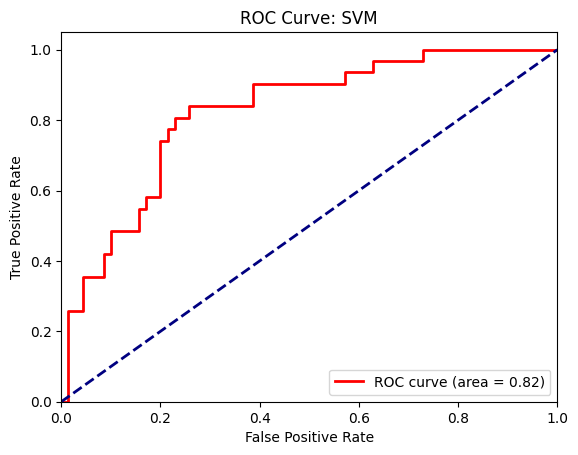

[[52 18]
 [ 5 26]]


,Predicted Survived,Predicted Death
True Survived,52,18
True Death,5,26


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Base SVM model with 10-fold cross-validation
svm = SVC(probability=True)  # Probability=True is needed for predict_proba
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Hyperparameter tuning setup for SVM
param_grid_svm = {
    'C': [0.01,0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  # 'gamma' is only relevant for 'rbf' and 'poly'
    'degree': [2, 3, 4]  # 'degree' is only relevant for 'poly'
}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=kf, scoring='recall')

# Fitting the SVM model
grid_search_svm.fit(X_train, y_train)

# Evaluating model on training data
train_pred_svm = grid_search_svm.predict(X_train)
train_pred_proba_svm = grid_search_svm.predict_proba(X_train)[:, 1]
train_metrics_svm = calculate_metrics(y_train, train_pred_svm, train_pred_proba_svm)

# Evaluating model on test data
test_pred_svm = grid_search_svm.predict(X_test)
test_pred_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]
test_metrics_svm = calculate_metrics(y_test, test_pred_svm, test_pred_proba_svm)

# Preparing the metrics table for SVM
metrics_table_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'AUC'],
    'Train Data': train_metrics_svm,
    'Test Data': test_metrics_svm
})
metrics_table_svm.set_index('Metric', inplace=True)

# Confusion Matrix for Test Data with SVM
confusion_matrix_test_svm = confusion_matrix(y_test, test_pred_svm)

# ROC Curve for Test Data with SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, test_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM')
plt.legend(loc="lower right")
plt.show()

print(confusion_matrix_test_svm)

metrics_table_svm.columns = ['Train_SVM', 'Test_SVM']
metrics_svm = pd.DataFrame(metrics_table_svm)
metrics_svm


# Confusion Matrix DataFrame for SVM
confusion_matrix_df_svm = pd.DataFrame(confusion_matrix_test_svm,
                                       index=['True Survived', 'True Death'],
                                       columns=['Predicted Survived', 'Predicted Death'])

confusion_matrix_df_svm


In [ ]:
grid_search_svm.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:

metrics_svm

,Train_SVM,Test_SVM
Metric,,
Accuracy,0.860000,0.772277
Sensitivity,0.924731,0.838710
Specificity,0.830918,0.742857
PPV,0.710744,0.590909
NPV,0.960894,0.912281
AUC,0.940782,0.822581


## Let's try SVM with reduced features

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(grid_search_svm.best_estimator_, X_train, y_train, scoring='recall')
importances = result.importances_mean

# Get indices of top features
top_k_features = np.argsort(importances)[-5:]  #  desired number of features


In [ ]:
# convert top_k_features to list
top_k_features = list(X_train.columns[top_k_features])
top_k_features

['LDH', 'IL6', 'Neutrophil %', 'LCR', 'severe_1']

In [ ]:

# Create new datasets with important features
X_train_reduced = X_train[top_k_features]
X_test_reduced = X_test[top_k_features]
X_train_reduced


,LDH,IL6,Neutrophil %,LCR,severe_1
0,-0.610671,-0.481833,-0.395985,-0.282028,0.0
1,-0.296703,-0.596662,0.484530,-0.111382,0.0
2,0.999681,2.783295,0.797237,-0.298317,1.0
3,-0.592441,-0.589064,0.780779,0.672428,0.0
4,-0.560031,-0.200964,-1.375250,-0.218036,1.0
...,...,...,...,...,...
295,-0.395958,-0.030161,0.361094,-0.304522,1.0
296,-0.576236,-0.362309,0.575051,-0.294051,1.0
297,-0.566108,-0.569173,1.109943,-0.298317,1.0
298,-0.025273,-0.535770,1.052340,-0.277762,0.0


In [ ]:

# Train new model on selected features. You might re-do hyperparameter tuning with GridSearchCV for this reduced model.
new_svm = SVC(probability=True)
new_svm.fit(X_train_reduced, y_train)

# Evaluate the new model
train_pred_new = new_svm.predict(X_train_reduced)
train_pred_proba_new = new_svm.predict_proba(X_train_reduced)[:, 1]
train_metrics_new = calculate_metrics(y_train, train_pred_new, train_pred_proba_new)

# Evaluating model on test data
test_pred_new = new_svm.predict(X_test_reduced)
test_pred_proba_new = new_svm.predict_proba(X_test_reduced)[:, 1]
test_metrics_new = calculate_metrics(y_test, test_pred_new, test_pred_proba_new)

# Preparing the metrics table for the new model
metrics_table_new = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'AUC'],
    'Train Data': train_metrics_new,
    'Test Data': test_metrics_new
})
metrics_table_new.set_index('Metric', inplace=True)

metrics_table_new






,Train Data,Test Data
Metric,,
Accuracy,0.863333,0.801980
Sensitivity,0.892473,0.838710
Specificity,0.850242,0.785714
PPV,0.728070,0.634146
NPV,0.946237,0.916667
AUC,0.912394,0.826728


In [ ]:
# confusion matrix for the new model
confusion_matrix_test_new = confusion_matrix(y_test, test_pred_new)
confusion_matrix_df_new = pd.DataFrame(confusion_matrix_test_new,
                                       index=['True Survived', 'True Death'],
                                       columns=['Predicted Survived', 'Predicted Death'])

confusion_matrix_df_new

,Predicted Survived,Predicted Death
True Survived,55,15
True Death,5,26


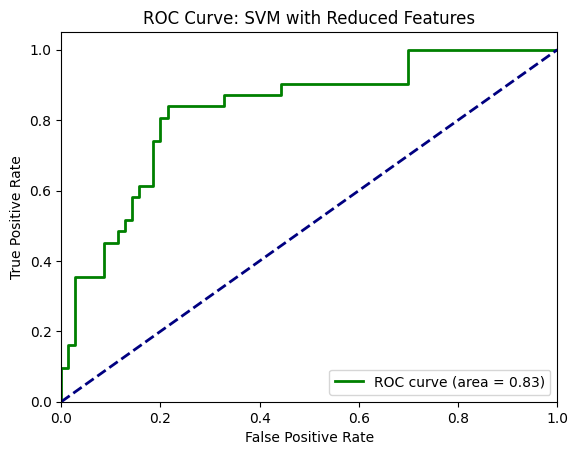

In [ ]:
# Draw AUC for the new model
fpr_new, tpr_new, thresholds_new = roc_curve(y_test, test_pred_proba_new)
roc_auc_new = auc(fpr_new, tpr_new)
plt.figure()
plt.plot(fpr_new, tpr_new, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_new)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM with Reduced Features')
plt.legend(loc="lower right")
plt.show()




In [ ]:
# save the new model
#joblib.dump(new_svm, 'svm_model_reduced_final.pkl')

In [ ]:
# features used for new model
top_k_features

['LDH', 'IL6', 'Neutrophil %', 'LCR', 'severe_1']

In [ ]:
import joblib

# Save the LDA model
joblib.dump(new_svm, 'svm_model_top5.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


# Save the original feature names (numerical and categorical)
joblib.dump(numerical_cols, 'numerical_cols.pkl')

# Save the top 5 features list
top_5_features = ['severe_1', 'LDH', 'IL6', 'Neutrophil %', 'LCR']
joblib.dump(top_k_features, 'top_5_features.pkl')


['top_5_features.pkl']

In [ ]:
df1 = df[['outcome','severe', 'LDH', 'IL6', 'Neutrophil %', 'LCR']]
df1.head()

,outcome,severe,LDH,IL6,Neutrophil %,LCR
0,survived,0,501,290.37,59.7,1.65
1,survived,0,645,21.31,90.0,0.47
2,survived,0,1477,4.67,90.0,1.11
3,survived,0,1385,49.20,74.1,14.30
4,survived,0,653,185.36,95.0,0.11


In [ ]:
# prompt: write df1 into a csv

df1.to_csv('reduced_data.csv', index=False)
